 Implement e-mail spam filtering using text classification algorithm with appropriate dataset

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.99      1.00      1.00       856
        Spam       0.99      0.98      0.99       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

Enter an email subject: Hello
Classification: Not Spam

Confusion Matrix:
 [[854   2]
 [  5 285]]


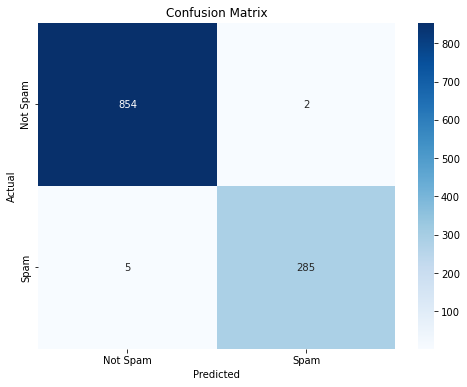

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score, classification_report
import re
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'emails.csv' with your actual file path)
data = pd.read_csv('emails.csv')

# Split the data into features (text) and target (spam)
X = data['text']
y = data['spam']

# Convert text to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
class_report = classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'])
print("Classification Report:\n", class_report)

# Define a function to classify email subjects
def classify_email(subject):
    cleaned_subject = re.sub(r'^Subject:\s*', '', subject)  # Remove "Subject:" prefix
    vectorized_subject = vectorizer.transform([cleaned_subject])
    prediction = svm_classifier.predict(vectorized_subject)
    if prediction[0] == 1:
        return "Spam"
    else:
        return "Not Spam"

# Ask the user to enter an email subject
user_input = input("Enter an email subject: ")
classification_result = classify_email(user_input)
print("Classification:", classification_result)

confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
